In [1]:
import nmresearch as nmr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tau = 3.6
cycle = 12*tau
cycle

43.2

c:\Users\awsta\Documents\qeg-env\Lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


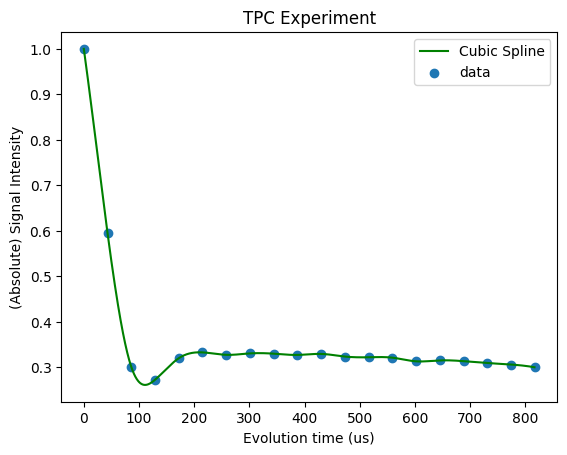

In [3]:
xx_no_fc = nmr.Experiment(218,folder='expt9').tpc(cycle=43,use_real=False)
t_list = np.array([i*cycle for i in range(len(xx_no_fc))])

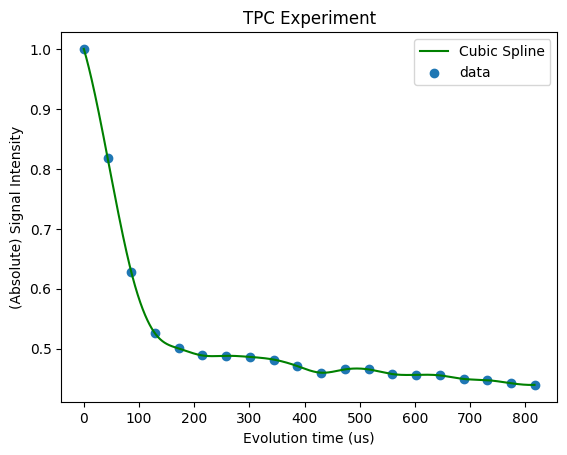

In [4]:
xx_fc = nmr.Experiment(219,folder='expt9').tpc(cycle=43,use_real=False)

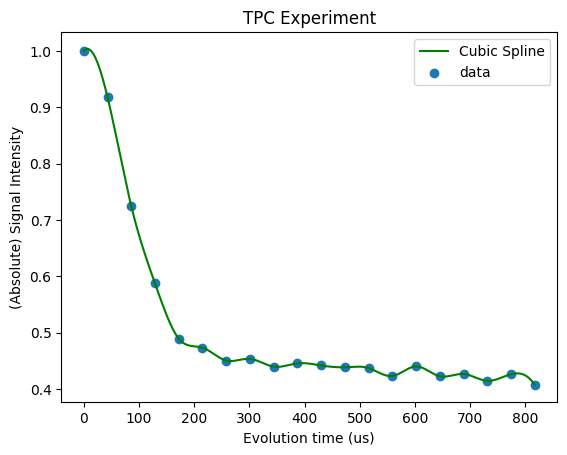

In [5]:
zz_fc = nmr.Experiment(220,folder='expt9').tpc(cycle=43,use_real=False)

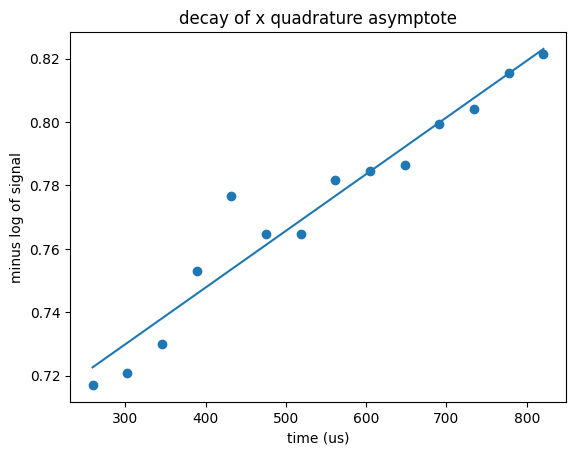

5594.130241487114


In [6]:
start = 6
end = 20

x = t_list[start:end]
y = -np.log(xx_fc[start:end])

px = np.polyfit(x,y, 1)
plt.plot(x, x*px[0] + px[1],label="fit")
plt.scatter(x,y,label="data")

plt.xlabel("time (us)")
plt.ylabel("minus log of signal")
plt.title("decay of x quadrature asymptote")
plt.show()

print(1/px[0])

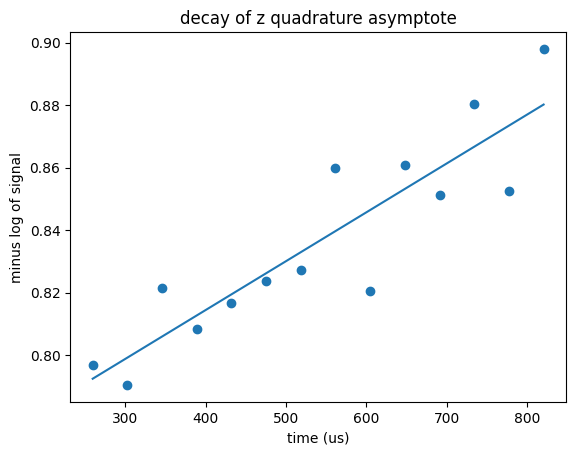

6400.284457190821


In [7]:
start = 6
end = 20

x = t_list[start:end]
y = -np.log(zz_fc[start:end])

pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label="fit")
plt.scatter(x,y,label="data")

plt.xlabel("time (us)")
plt.ylabel("minus log of signal")
plt.title("decay of z quadrature asymptote")
plt.show()

print(1/pz[0])

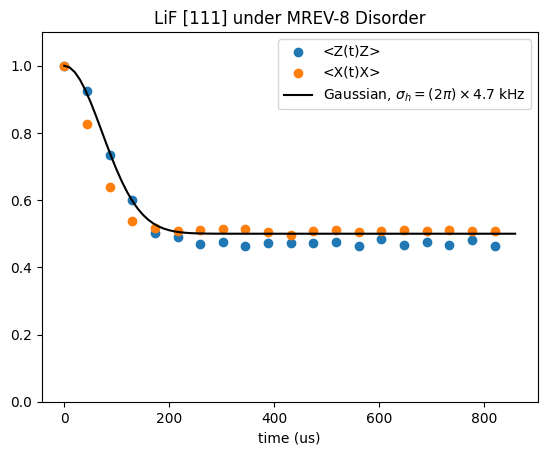

In [ ]:
plt.scatter(t_list,zz_fc/np.exp(-t_list*pz[0]),label="<Z(t)Z>")
plt.scatter(t_list,xx_fc/np.exp(-t_list*px[0]),label="<X(t)X>")
plt.ylim([0,1.1])



tsmooth = np.arange(0,43.2*len(zz_fc), 10)
h = (2*np.pi) * 4.7 * 10**-3 # Value from numerics
plt.plot(tsmooth,1/2+1/2*np.exp(-((h)*tsmooth/3)**2),label=r"Gaussian, $\sigma_h=(2\pi)\times4.7$ kHz",color="black")

plt.legend()
plt.xlabel("time (us)")
plt.title("LiF [111] under MREV-8 Disorder")
plt.show()

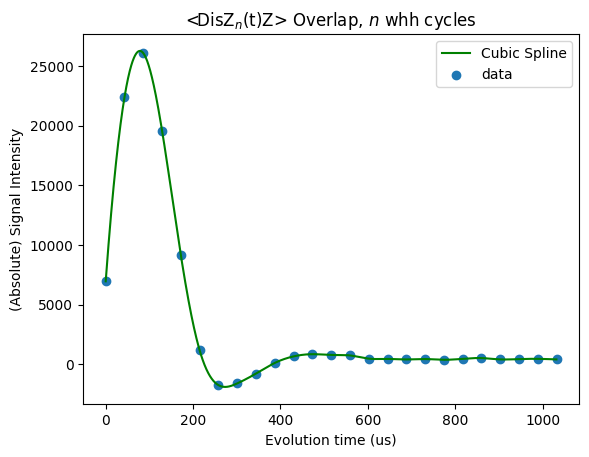

In [9]:
diz_Z = nmr.Experiment(256,folder='expt9').tpc(cycle=43, use_real=False,title=r"<DisZ$_n$(t)Z> Overlap, $n$ whh cycles",normalize=False)

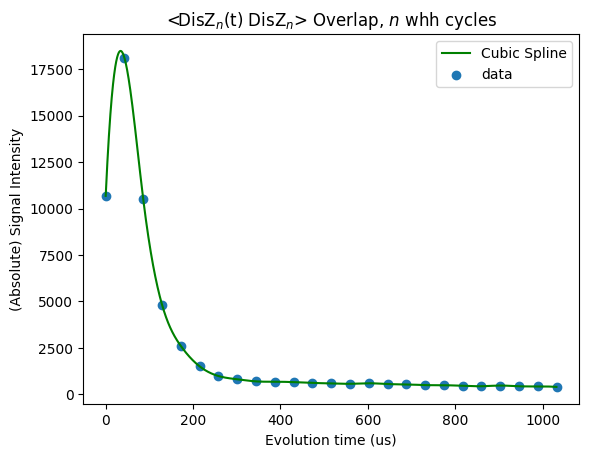

In [10]:
diz_diz = nmr.Experiment(257,folder='expt9').tpc(cycle=43, use_real=False,title=r"<DisZ$_n$(t) DisZ$_n$> Overlap, $n$ whh cycles",normalize=False)

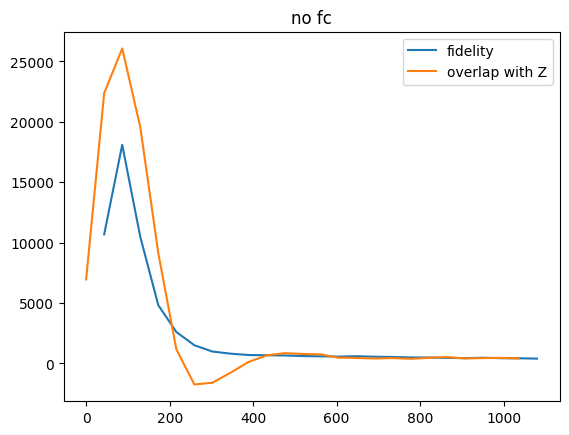

In [11]:
t1 =  np.arange(0,43.2*25, 43.2)
t2 =  np.arange(43.2,43.2*26, 43.2)
plt.plot(t2,diz_diz,label="fidelity")
plt.plot(t1,diz_Z,label="overlap with Z")
plt.legend()
plt.title("no fc")
plt.show()

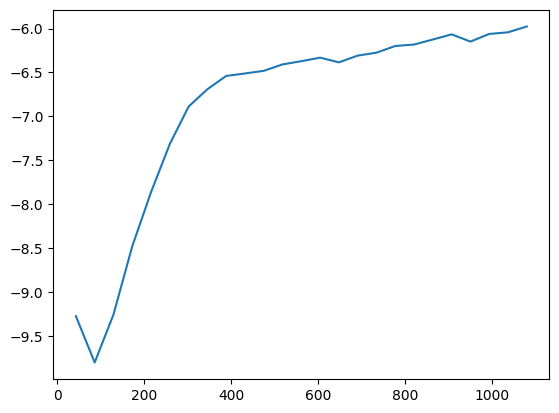

In [12]:
plt.plot(t2,-np.log(diz_diz),label="fidelity")

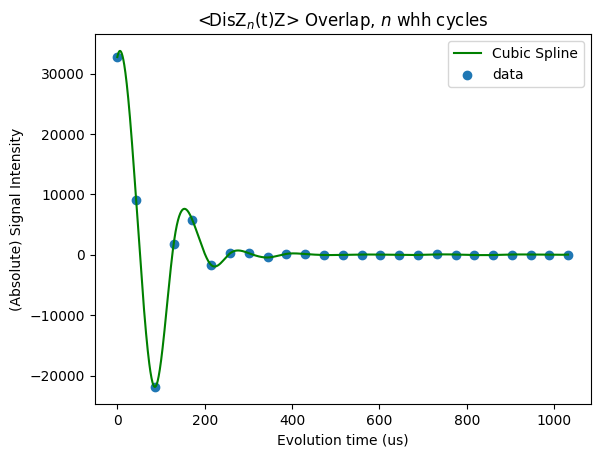

In [13]:
diz_Z_fc_raw = nmr.Experiment(266,folder='expt9').tpc(cycle=43, use_real=False,title=r"<DisZ$_n$(t)Z> Overlap, $n$ whh cycles",normalize=False)

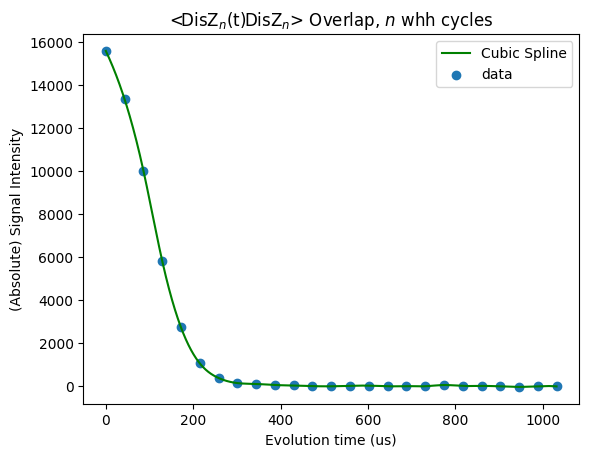

In [14]:
diz_diz_fc = nmr.Experiment(268,folder='expt9').tpc(cycle=43, use_real=False,title=r"<DisZ$_n$(t)DisZ$_n$> Overlap, $n$ whh cycles",normalize=False)

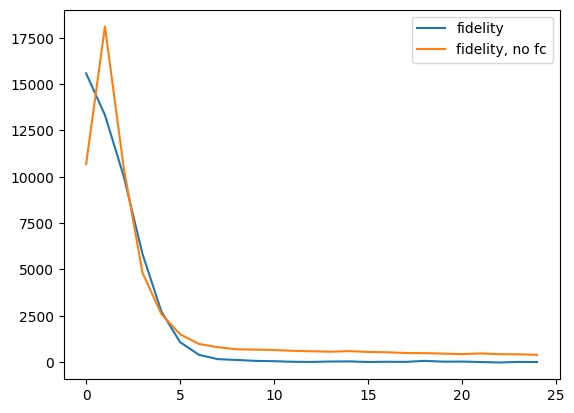

In [15]:
plt.plot(diz_diz_fc,label="fidelity")
#plt.plot(abs(diz_Z_fc_raw[1:]), label="direct, bad fc")
#plt.plot(diz_Z[1:], label="direct, no fc")
plt.plot(diz_diz,label="fidelity, no fc")
plt.legend()
plt.show()

In [16]:
print(nmr.PulseProgram.disorder_fidelity_cal(fc=12,n_max=25))

25m ip5*192
25m ip14*192
25m ip15*192
25m ip16*192
25m ip17*192
25m ip18*192
25m ip19*24

ph0 = (360) 90 90 270 270 0 0 180 180

ph1 = (360) 12 60 288 336 204 252 120 168 36 84 312 0 228 276 144 192 60 108 336 24 252 300 168 216 84 132 0 48 276 324 192 240 108 156 24 72 300 348 216 264 132 180 48 96 324 12 240 288 156 204 72 120 348 36 264 312 180 228 96 144 12 60 288 336 204 252 120 168 36 84 312 0 228 276 144 192 60 108 336 24 252 300 168 216 84 132 0 48 276 324 192 240 108 156 24 72 300 348 216 264
ph2 = (360) 114 162 30 78 306 354 222 270 138 186 54 102 330 18 246 294 162 210 78 126 354 42 270 318 186 234 102 150 18 66 294 342 210 258 126 174 42 90 318 6 234 282 150 198 66 114 342 30 258 306 174 222 90 138 6 54 282 330 198 246 114 162 30 78 306 354 222 270 138 186 54 102 330 18 246 294 162 210 78 126 354 42 270 318 186 234 102 150 18 66 294 342 210 258 126 174 42 90 318 6
ph3 = (360) 126 174 42 90 318 6 234 282 150 198 66 114 342 30 258 306 174 222 90 138 6 54 282 330 198 246 114 1

In [17]:
print(nmr.PulseProgram.dtc_ken16_compiled_8(0,fc=0,n_max=1,phi=0))

ph0 = (360) 0 180
ph1 = (360) 90 270
ph2 = (360) 90 270
ph3 = (360) 0 180
ph4 = (360) 0 180
ph5 = (360) 90 270
ph6 = (360) 90 270
ph7 = (360) 0 180


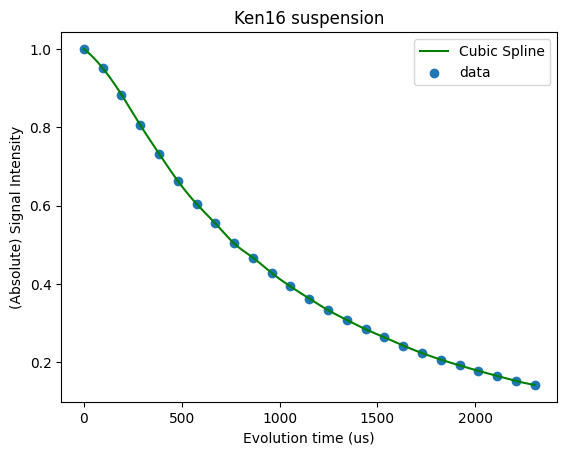

In [18]:
ken16_susp = nmr.Experiment(274,folder='expt9').tpc(cycle=96, use_real=False,title=r"Ken16 suspension",normalize=True)

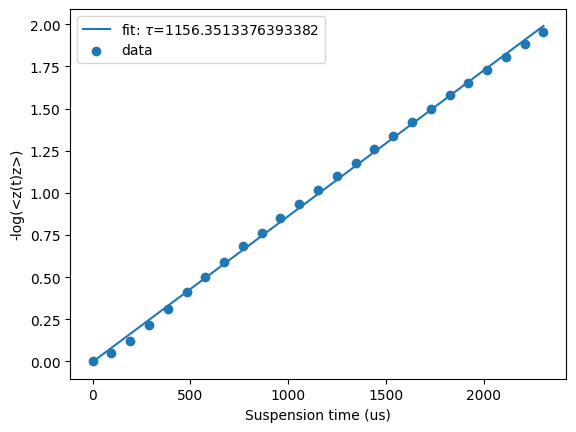

In [19]:
t_list = np.arange(0,25*96,96)

x=t_list
y=-np.log(ken16_susp)

pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"fit: $\tau$="+str(1/pz[0]))
plt.scatter(x,y,label="data")
plt.legend()
plt.xlabel("Suspension time (us)")
plt.ylabel("-log(<z(t)z>)")
plt.show()

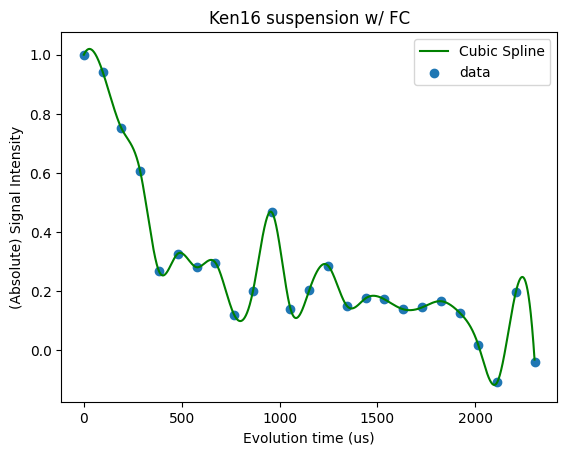

In [20]:
ken16_susp_fc = nmr.Experiment(275,folder='expt9').tpc(cycle=96, use_real=False,title=r"Ken16 suspension w/ FC",normalize=True)

In [21]:
print(nmr.PulseProgram.dtc_ken16_compiled_8(0,fc=-12,n_max=25,phi=0))

ph0 = (360) 0 84 168 252 336 60 144 228 312 36 120 204 288 12 96 180 264 348 72 156 240 324 48 132 216 300 24 108 192 276 0 84 168 252 336 60 144 228 312 36 120 204 288 12 96 180 264 348 72 156
ph1 = (360) 78 162 246 330 54 138 222 306 30 114 198 282 6 90 174 258 342 66 150 234 318 42 126 210 294 18 102 186 270 354 78 162 246 330 54 138 222 306 30 114 198 282 6 90 174 258 342 66 150 234
ph2 = (360) 66 150 234 318 42 126 210 294 18 102 186 270 354 78 162 246 330 54 138 222 306 30 114 198 282 6 90 174 258 342 66 150 234 318 42 126 210 294 18 102 186 270 354 78 162 246 330 54 138 222
ph3 = (360) 324 48 132 216 300 24 108 192 276 0 84 168 252 336 60 144 228 312 36 120 204 288 12 96 180 264 348 72 156 240 324 48 132 216 300 24 108 192 276 0 84 168 252 336 60 144 228 312 36 120
ph4 = (360) 312 36 120 204 288 12 96 180 264 348 72 156 240 324 48 132 216 300 24 108 192 276 0 84 168 252 336 60 144 228 312 36 120 204 288 12 96 180 264 348 72 156 240 324 48 132 216 300 24 108
ph5 = (360) 30 114 19

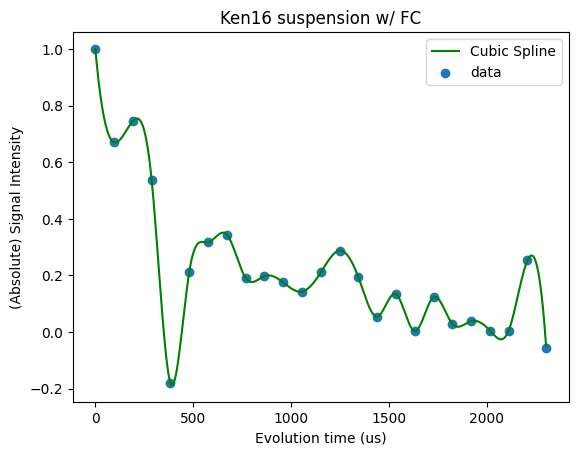

In [22]:
ken16_susp_fc = nmr.Experiment(276,folder='expt9').tpc(cycle=96, use_real=False,title=r"Ken16 suspension w/ FC",normalize=True)

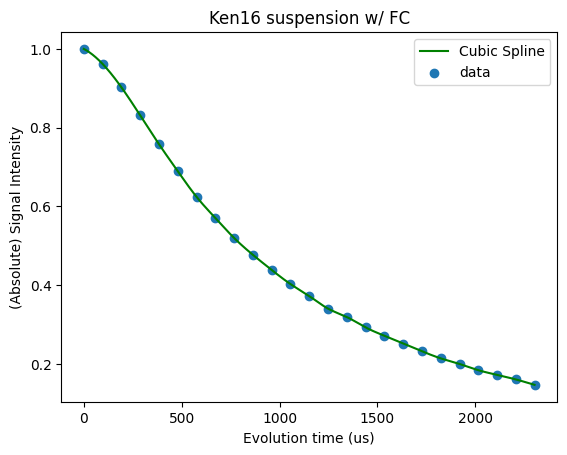

In [23]:
ken16_susp_fc = nmr.Experiment(279,folder='expt9').tpc(cycle=96, use_real=False,title=r"Ken16 suspension w/ FC",normalize=True)

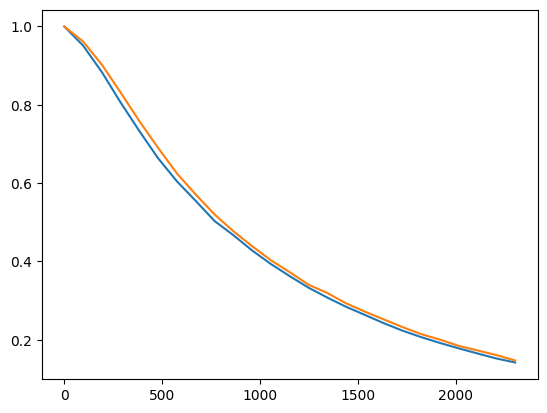

In [24]:
plt.plot(t_list,ken16_susp)
plt.plot(t_list,ken16_susp_fc)
plt.show()

In [25]:
print(nmr.PulseProgram.wahuha8_pi(0,1))

ph0 = (360) 0 180
ph1 = (360) 90 270
ph2 = (360) 270 90
ph3 = (360) 180 180


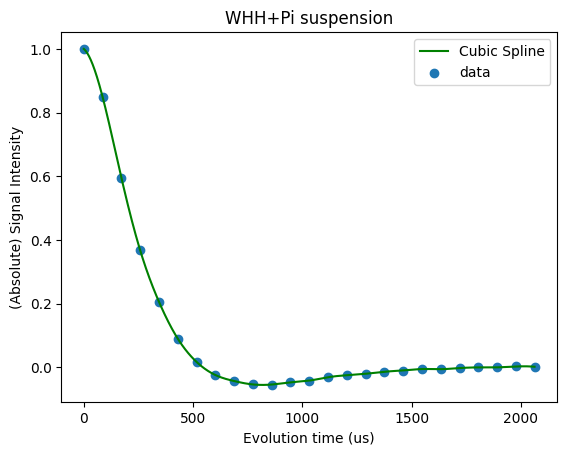

In [26]:
whh_pi_susp = nmr.Experiment(281,folder='expt9').tpc(cycle=43*2, use_real=False,title=r"WHH+Pi suspension",normalize=True)

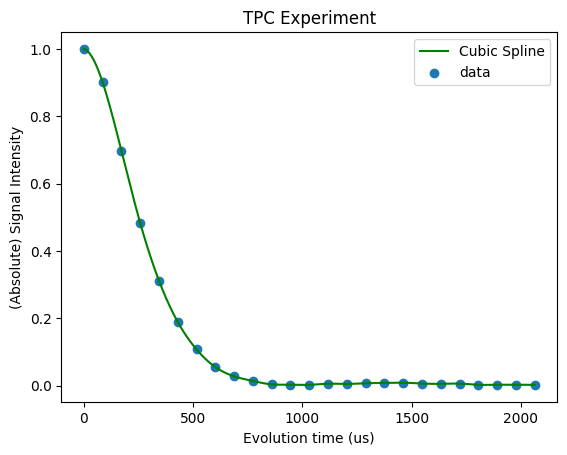

In [63]:
staber_pi = nmr.Experiment(344,folder='expt9').tpc(use_real=False,cycle=86)

In [64]:
print(nmr.PulseProgram.wahuha8_pi(fc=12,n_max=50))

ph0 = (360) 0 228 96 324 192 60 288 156 24 252 120 348 216 84 312 180 48 276 144 12 240 108 336 204 72 300 168 36 264 132 0 228 96 324 192 60 288 156 24 252 120 348 216 84 312 180 48 276 144 12 240 108 336 204 72 300 168 36 264 132 0 228 96 324 192 60 288 156 24 252 120 348 216 84 312 180 48 276 144 12 240 108 336 204 72 300 168 36 264 132 0 228 96 324 192 60 288 156 24 252
ph1 = (360) 102 330 198 66 294 162 30 258 126 354 222 90 318 186 54 282 150 18 246 114 342 210 78 306 174 42 270 138 6 234 102 330 198 66 294 162 30 258 126 354 222 90 318 186 54 282 150 18 246 114 342 210 78 306 174 42 270 138 6 234 102 330 198 66 294 162 30 258 126 354 222 90 318 186 54 282 150 18 246 114 342 210 78 306 174 42 270 138 6 234 102 330 198 66 294 162 30 258 126 354
ph2 = (360) 294 162 30 258 126 354 222 90 318 186 54 282 150 18 246 114 342 210 78 306 174 42 270 138 6 234 102 330 198 66 294 162 30 258 126 354 222 90 318 186 54 282 150 18 246 114 342 210 78 306 174 42 270 138 6 234 102 330 198 66 294 16

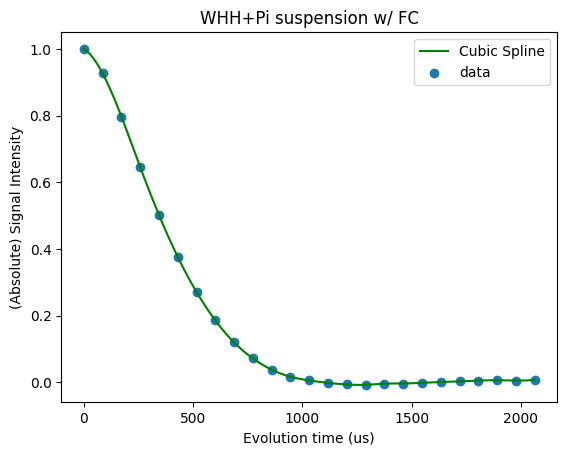

In [65]:
whh_pi_susp_fc = nmr.Experiment(282,folder='expt9').tpc(cycle=43*2, use_real=False,title=r"WHH+Pi suspension w/ FC",normalize=True)

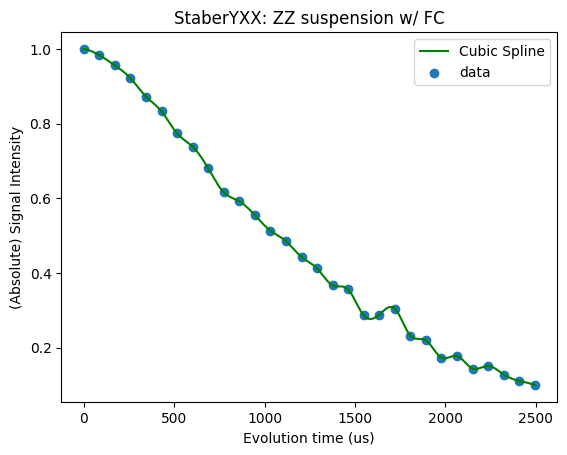

In [236]:
staberYXX_zz = nmr.Experiment(371, folder='expt9').tpc(cycle=int(12*3.6*2), use_real=False,title=r"StaberYXX: ZZ suspension w/ FC",normalize=True)

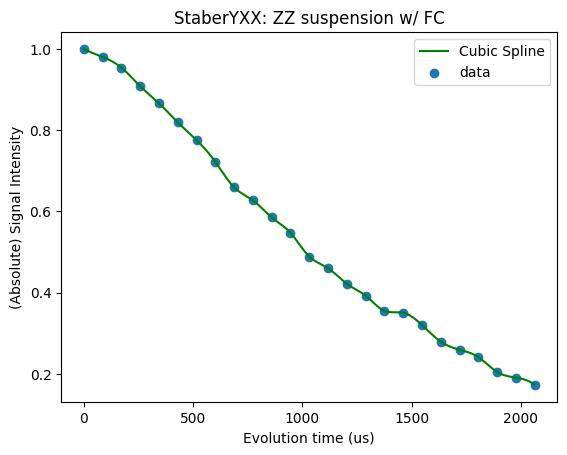

In [243]:
staberYXX_zz1 = nmr.Experiment(379, folder='expt9').tpc(cycle=int(12*3.6*2), use_real=False,title=r"StaberYXX: ZZ suspension w/ FC",normalize=True)

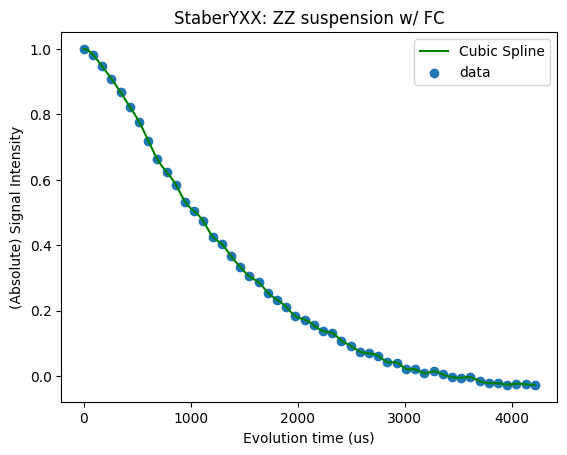

In [245]:
staberYXX_zz2 = nmr.Experiment(380, folder='expt9').tpc(cycle=int(12*3.6*2), use_real=False,title=r"StaberYXX: ZZ suspension w/ FC",normalize=True)

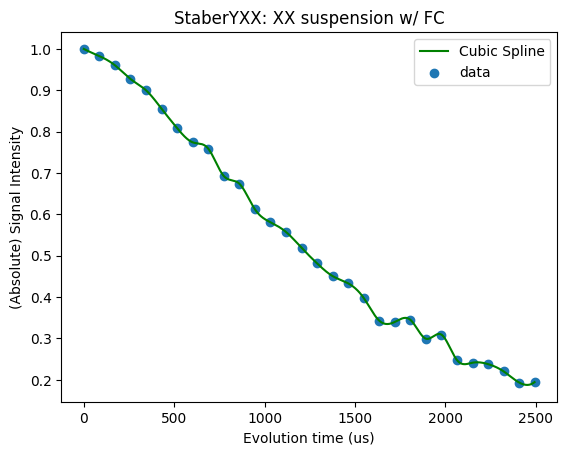

In [237]:
staberYXX_xx = nmr.Experiment(372, folder='expt9').tpc(cycle=int(12*3.6*2), use_real=False,title=r"StaberYXX: XX suspension w/ FC",normalize=True)

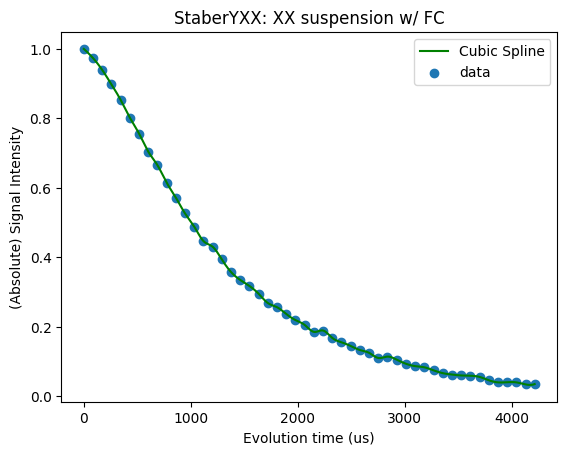

In [250]:
staberYXX_xx1 = nmr.Experiment(382, folder='expt9').tpc(cycle=int(12*3.6*2), use_real=False,title=r"StaberYXX: XX suspension w/ FC",normalize=True)

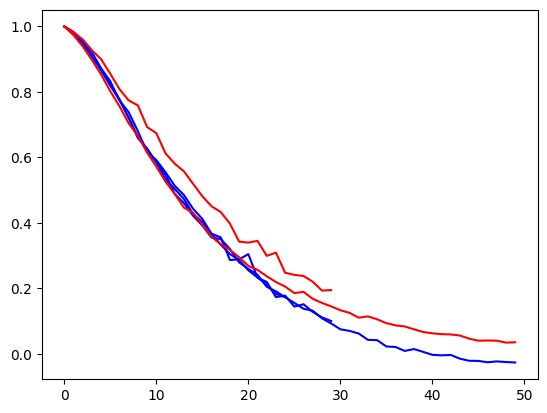

In [252]:
plt.plot(staberYXX_zz, color="blue")
plt.plot(staberYXX_zz1,color="blue")
plt.plot(staberYXX_zz2, color="blue")
plt.plot(staberYXX_xx, color="red")
plt.plot(staberYXX_xx1,color='red')

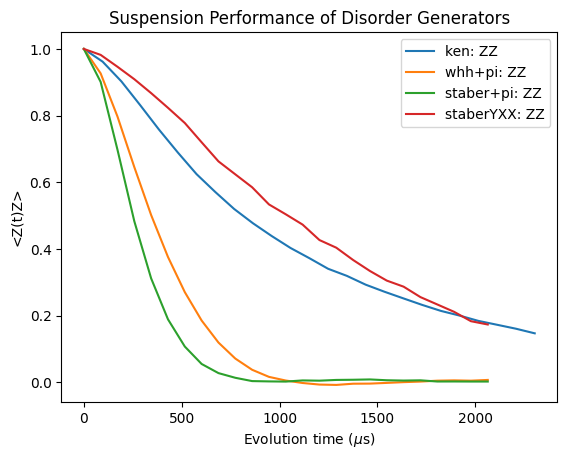

In [268]:
plt.plot(t_list,ken16_susp_fc,label="ken: ZZ")
plt.plot(t_list*(43*2/96),whh_pi_susp_fc,label="whh+pi: ZZ")
plt.plot(t_list*(43*2/96),staber_pi[:25],label="staber+pi: ZZ")
plt.plot(t_list*(43*2/96),staberYXX_zz2[:25],label="staberYXX: ZZ")
#plt.plot(t_list*(43*2/96),staberYXX_xx[:25],label="staberYXX: XX")
plt.legend()
plt.xlabel(r"Evolution time ($\mu$s)")
plt.ylabel("<Z(t)Z>")
plt.title("Suspension Performance of Disorder Generators")
plt.show()


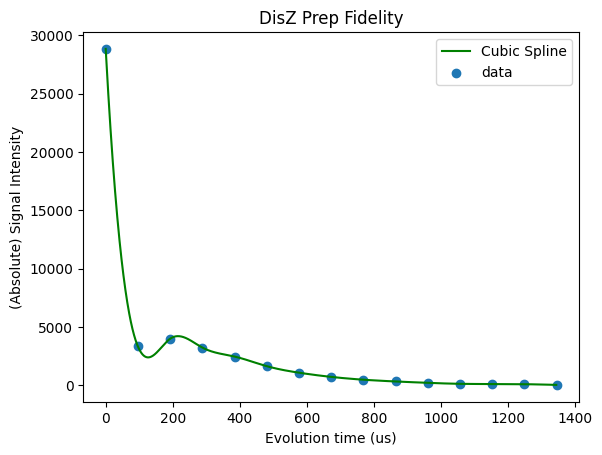

In [30]:
diz_diz_ken = nmr.Experiment(286,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ Prep Fidelity",normalize=False)

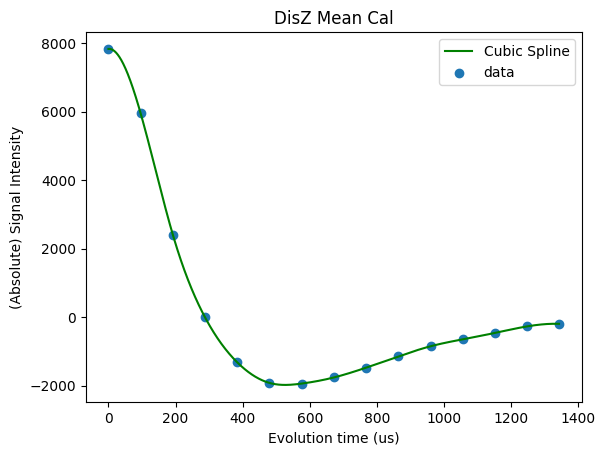

In [31]:
diz_z_ken = nmr.Experiment(294,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ Mean Cal",normalize=False)

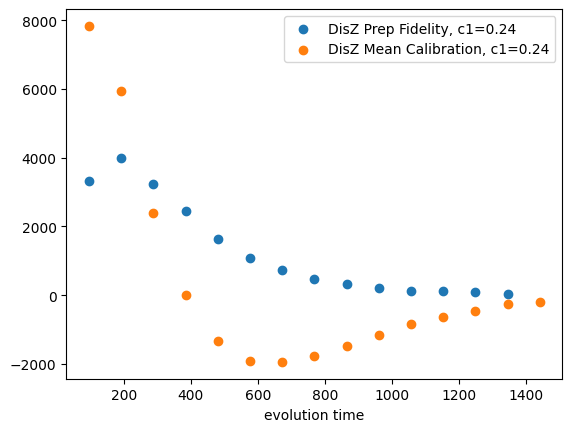

In [32]:
plt.scatter(np.arange(96,96*15,96),diz_diz_ken[1:],label="DisZ Prep Fidelity, c1=0.24")
plt.scatter(np.arange(96,96*16,96),diz_z_ken,label="DisZ Mean Calibration, c1=0.24")
plt.legend()
plt.xlabel("evolution time")
plt.show()

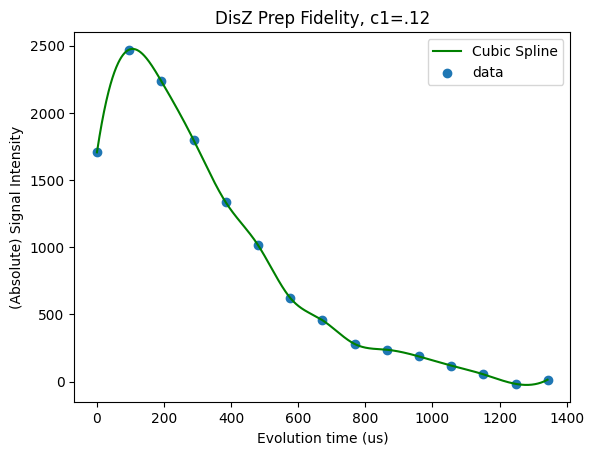

In [33]:
diz_diz_ken_12 = nmr.Experiment(295,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ Prep Fidelity, c1=.12",normalize=False)

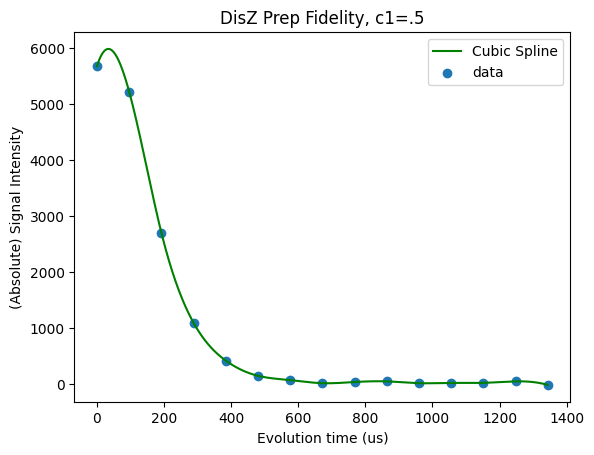

In [34]:
diz_diz_ken_50 = nmr.Experiment(297,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ Prep Fidelity, c1=.5",normalize=False)

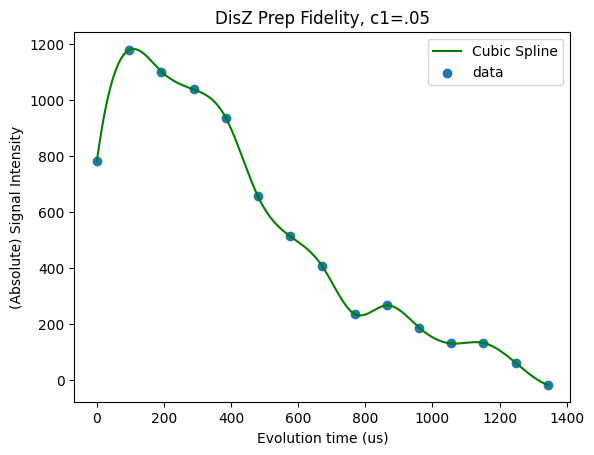

In [35]:
diz_diz_ken_05 = nmr.Experiment(298,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ Prep Fidelity, c1=.05",normalize=False)

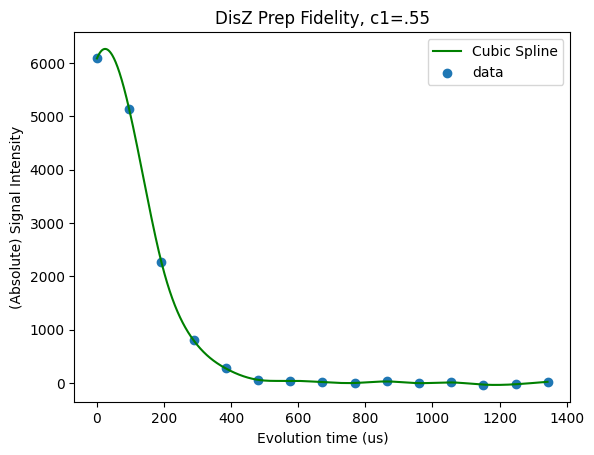

In [36]:
diz_diz_ken_55 = nmr.Experiment(299,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ Prep Fidelity, c1=.55",normalize=False)

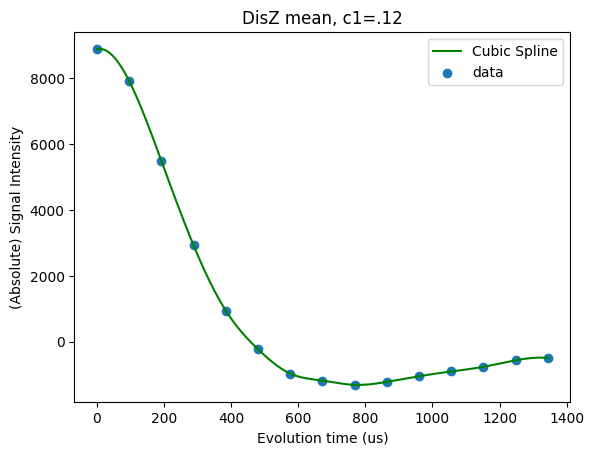

In [37]:
diz_z_ken_12 = nmr.Experiment(306,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ mean, c1=.12",normalize=False)

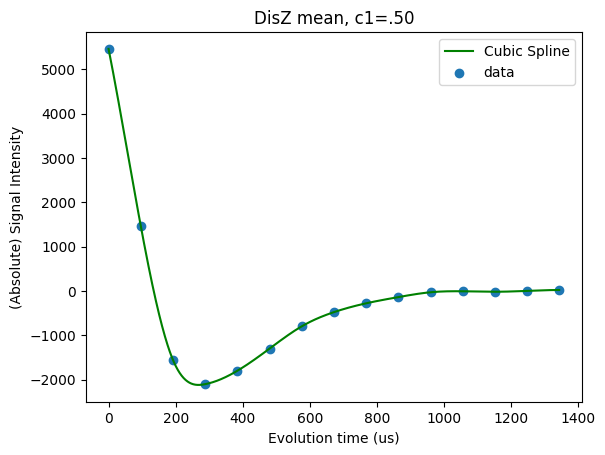

In [38]:
diz_z_ken_50 = nmr.Experiment(307,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ mean, c1=.50",normalize=False)

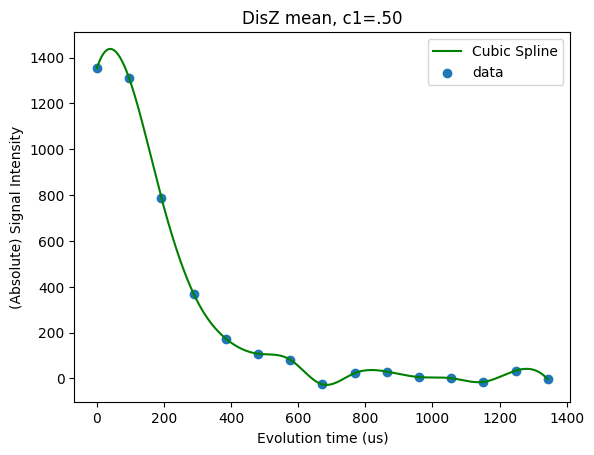

In [39]:
diz_z_alt_ken_50 = nmr.Experiment(308,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ mean, c1=.50",normalize=False)

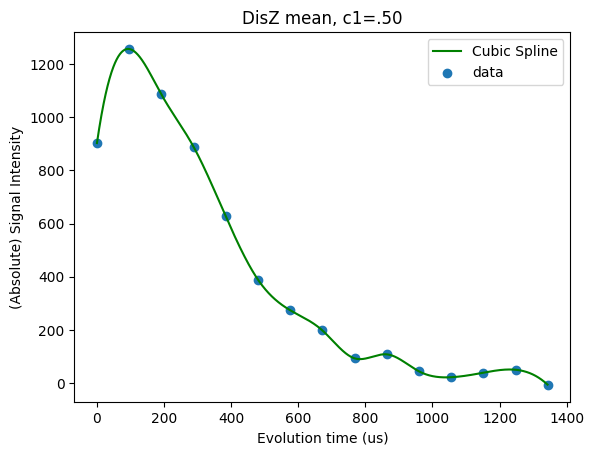

In [40]:
diz_z_alt_ken_24 = nmr.Experiment(309,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ mean, c1=.50",normalize=False)

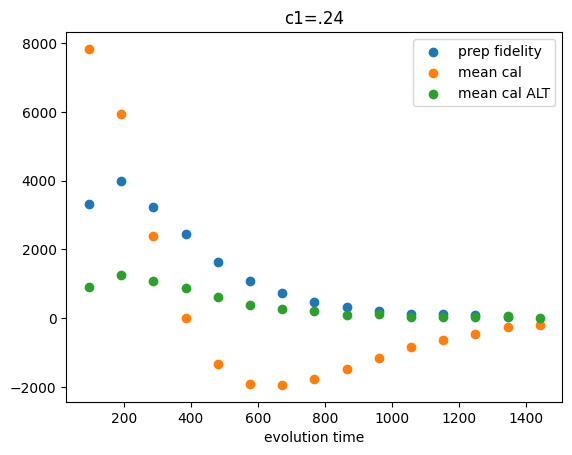

In [41]:
plt.scatter(np.arange(96,96*15,96),diz_diz_ken[1:],label="prep fidelity")
plt.scatter(np.arange(96,96*16,96),diz_z_ken,label="mean cal")
plt.scatter(np.arange(96,96*16,96),diz_z_alt_ken_24, label="mean cal ALT")
plt.legend()
plt.title("c1=.24")
plt.xlabel("evolution time")
plt.show()

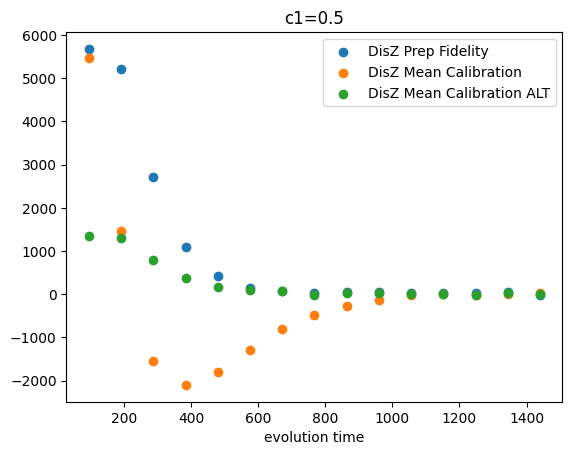

In [42]:
plt.scatter(np.arange(96,96*16,96),diz_diz_ken_50,label="DisZ Prep Fidelity")
plt.scatter(np.arange(96,96*16,96),diz_z_ken_50,label="DisZ Mean Calibration")
plt.scatter(np.arange(96,96*16,96),diz_z_alt_ken_50,label="DisZ Mean Calibration ALT")
plt.legend()
plt.title("c1=0.5")
plt.xlabel("evolution time")
plt.show()

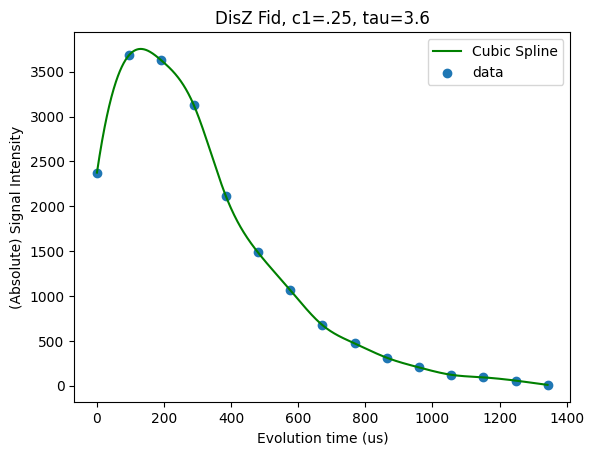

In [43]:
diz_fidelity_short_25 = nmr.Experiment(317,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ Fid, c1=.25, tau=3.6",normalize=False)

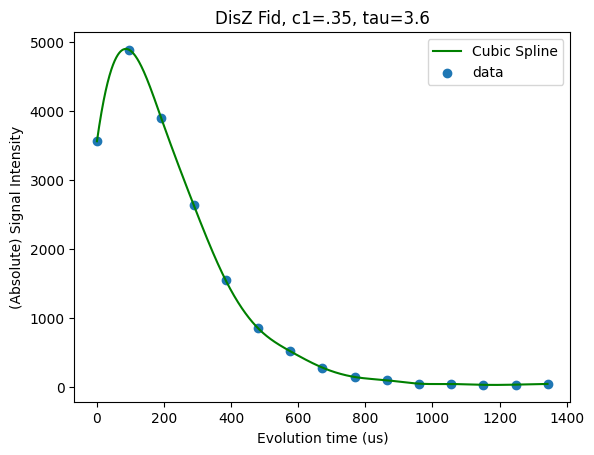

In [44]:
diz_fidelity_short_35 = nmr.Experiment(318,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ Fid, c1=.35, tau=3.6",normalize=False)

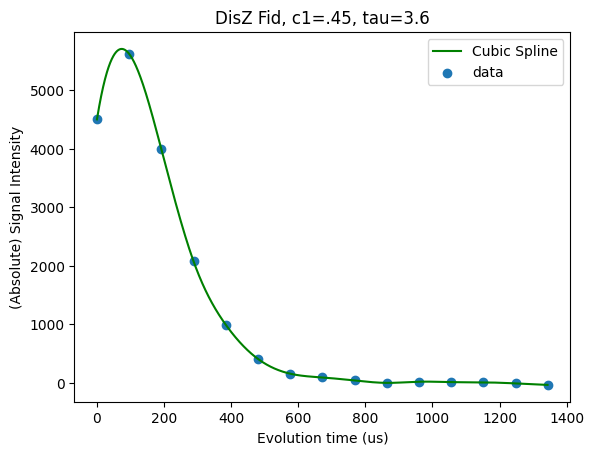

In [45]:
diz_fidelity_short_45 = nmr.Experiment(319,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ Fid, c1=.45, tau=3.6",normalize=False)

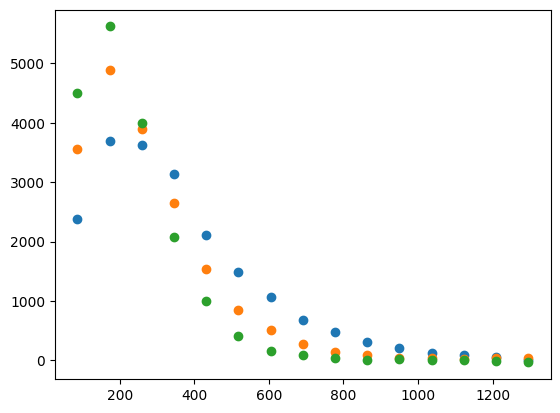

In [157]:
T = 3.6*24
times = np.arange(T, 16*T,T)
plt.scatter(times, diz_fidelity_short_25)
plt.scatter(times, diz_fidelity_short_35)
plt.scatter(times, diz_fidelity_short_45)

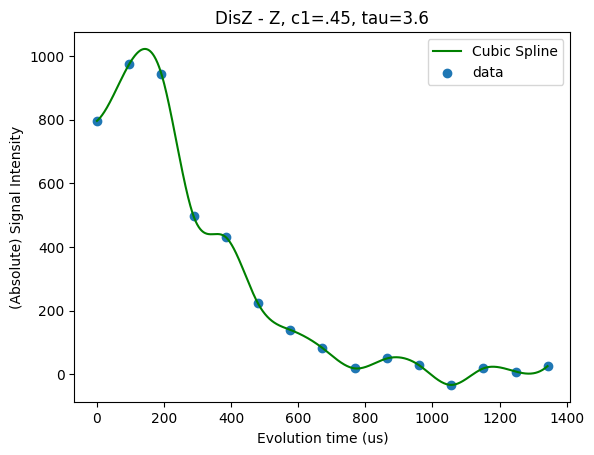

In [158]:
diz_homog_short_45 = nmr.Experiment(320,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ - Z, c1=.45, tau=3.6",normalize=False)

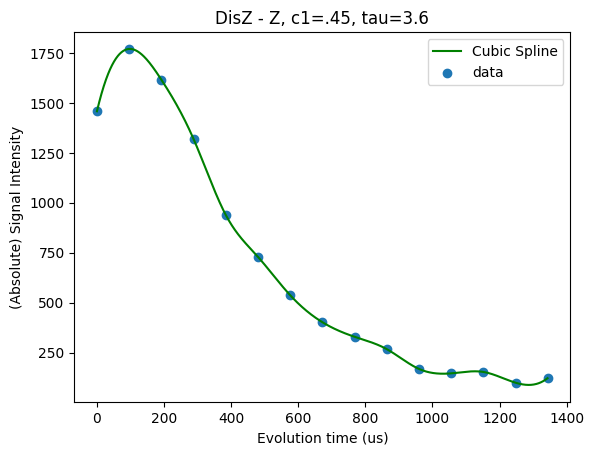

In [159]:
diz_homog_fwd_short_45 = nmr.Experiment(329,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ - Z, c1=.45, tau=3.6",normalize=False)

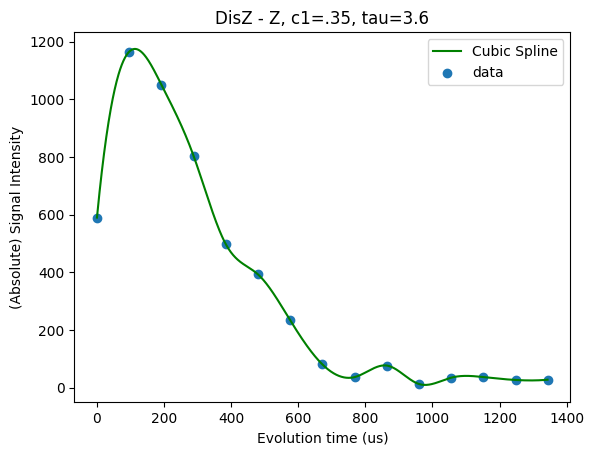

In [160]:
diz_homog_short_35 = nmr.Experiment(321,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ - Z, c1=.35, tau=3.6",normalize=False)

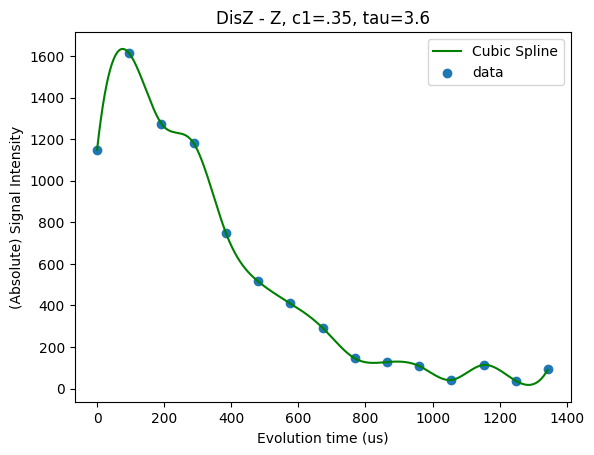

In [161]:
diz_homog_fwd_short_35 = nmr.Experiment(328,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ - Z, c1=.35, tau=3.6",normalize=False)

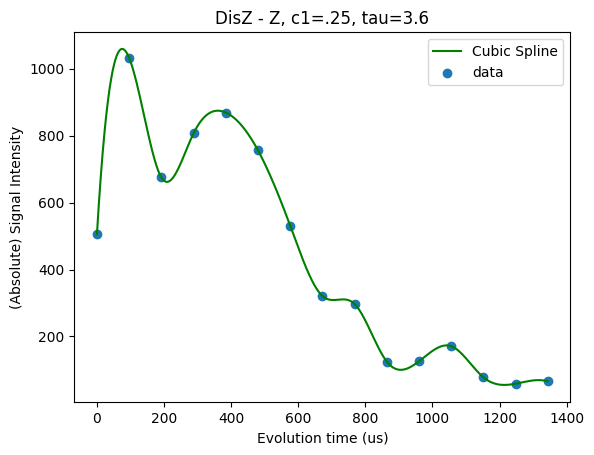

In [162]:
diz_homog_short_25 = nmr.Experiment(322,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ - Z, c1=.25, tau=3.6",normalize=False)

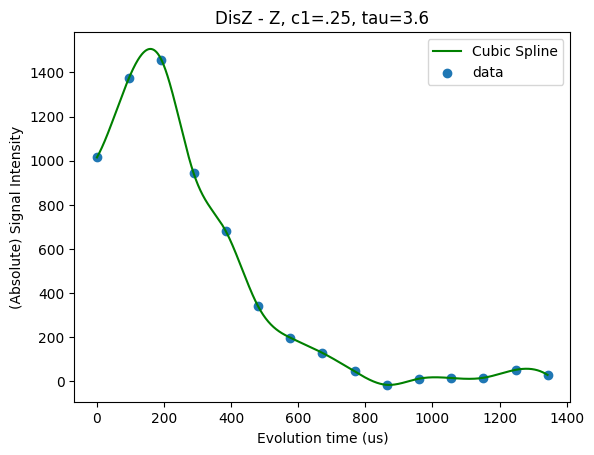

In [163]:
diz_homog_fwd_short_25 = nmr.Experiment(327,folder='expt9').tpc(cycle=96, use_real=False,title=r"DisZ - Z, c1=.25, tau=3.6",normalize=False)

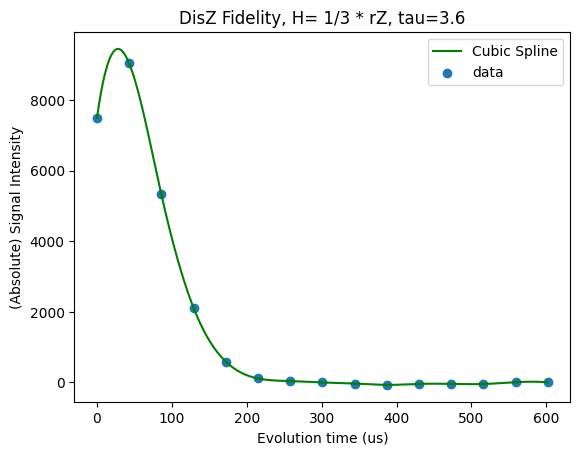

In [164]:
diz_staber_fid = nmr.Experiment(346,folder='expt9').tpc(cycle=43, use_real=False,title=r"DisZ Fidelity, H= 1/3 * rZ, tau=3.6",normalize=False)

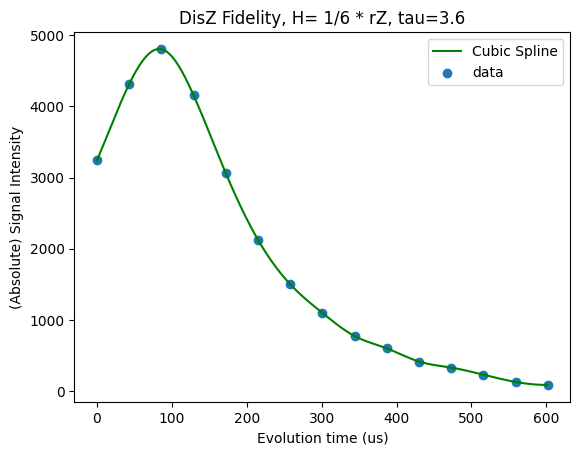

In [207]:
diz_staber2_fid = nmr.Experiment(352,folder='expt9').tpc(cycle=43, use_real=False,title=r"DisZ Fidelity, H= 1/6 * rZ, tau=3.6",normalize=False)

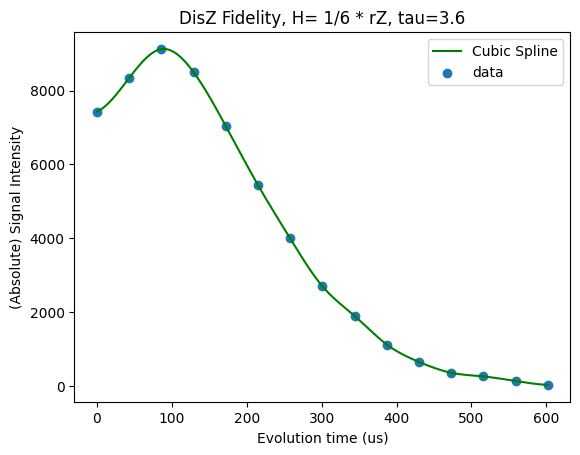

In [208]:
diz_staberYXX_fid = nmr.Experiment(353,folder='expt9').tpc(cycle=43, use_real=False,title=r"DisZ Fidelity, H= 1/6 * rZ, tau=3.6",normalize=False)

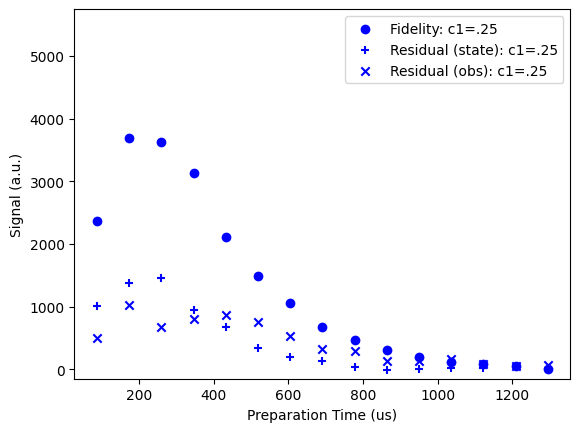

In [165]:
plt.scatter(times, diz_fidelity_short_25,label="Fidelity: c1=.25",marker="o",color="blue")
plt.scatter(times, diz_homog_fwd_short_25,label="Residual (state): c1=.25",marker="+",color="blue")
plt.scatter(times, diz_homog_short_25,label="Residual (obs): c1=.25",marker="x",color="blue")
plt.ylim([-150,5750])
plt.legend()
plt.xlabel("Preparation Time (us)")
plt.ylabel("Signal (a.u.)")
plt.show()

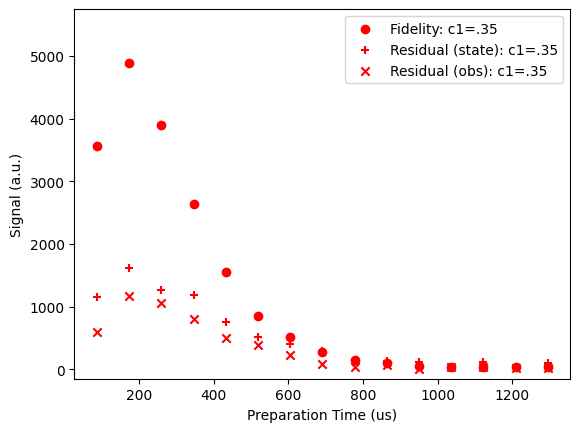

In [166]:
plt.scatter(times, diz_fidelity_short_35,label="Fidelity: c1=.35",marker="o",color="red")
plt.scatter(times, diz_homog_fwd_short_35,label="Residual (state): c1=.35",marker="+",color="red")
plt.scatter(times, diz_homog_short_35,label="Residual (obs): c1=.35",marker="x",color="red")
plt.legend()
plt.ylim([-150,5750])
plt.xlabel("Preparation Time (us)")
plt.ylabel("Signal (a.u.)")
plt.show()

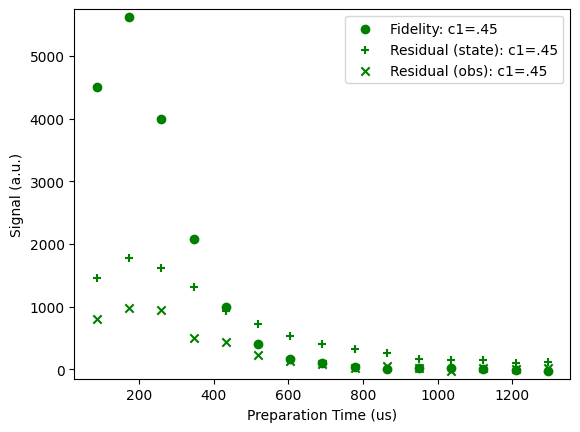

In [167]:

plt.scatter(times, diz_fidelity_short_45,label="Fidelity: c1=.45",marker="o",color="green")
plt.scatter(times, diz_homog_fwd_short_45,label="Residual (state): c1=.45",marker="+",color="green")
plt.scatter(times, diz_homog_short_45,label="Residual (obs): c1=.45",marker="x",color="green")
plt.ylim([-150,5750])
plt.legend()
plt.xlabel("Preparation Time (us)")
plt.ylabel("Signal (a.u.)")
plt.show()

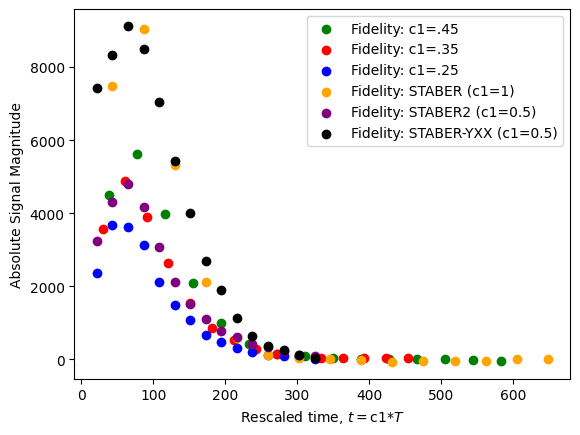

In [191]:
plt.scatter((.45)*times, diz_fidelity_short_45,label="Fidelity: c1=.45",marker="o",color="green")
plt.scatter((.35)*times, diz_fidelity_short_35,label="Fidelity: c1=.35",marker="o",color="red")
plt.scatter((.25)*times, diz_fidelity_short_25,label="Fidelity: c1=.25",marker="o",color="blue")
plt.scatter((1)*times/2, diz_staber_fid,label="Fidelity: STABER (c1=1)",marker="o",color="orange")
plt.scatter((0.5)*times/2, diz_staber2_fid,label="Fidelity: STABER2 (c1=0.5)",marker="o",color="purple")
plt.scatter((0.5)*times/2, diz_staberYXX_fid,label="Fidelity: STABER-YXX (c1=0.5)",marker="o",color="black")
plt.legend()
plt.xlabel(r"Rescaled time, $t =$c1*$T$")
plt.ylabel("Absolute Signal Magnitude")
plt.show()


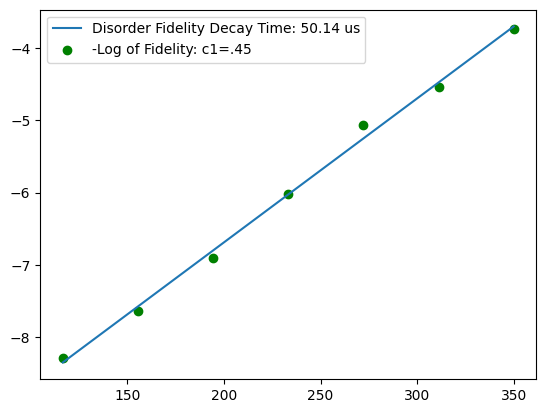

In [169]:
x=(.45)*times[2:9]
y= -np.log(diz_fidelity_short_45[2:9])

pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]))
plt.scatter(x,y,label="-Log of Fidelity: c1=.45",marker="o",color="green")


plt.legend()
plt.show()

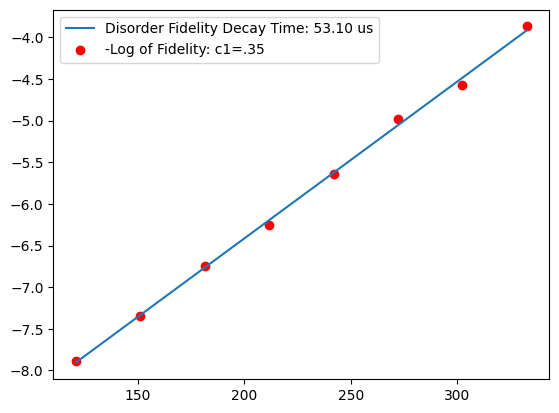

In [170]:
x=(.35)*times[3:11]
y= -np.log(diz_fidelity_short_35[3:11])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]))
plt.scatter(x,y,label="-Log of Fidelity: c1=.35",marker="o",color="red")
plt.legend()
plt.show()

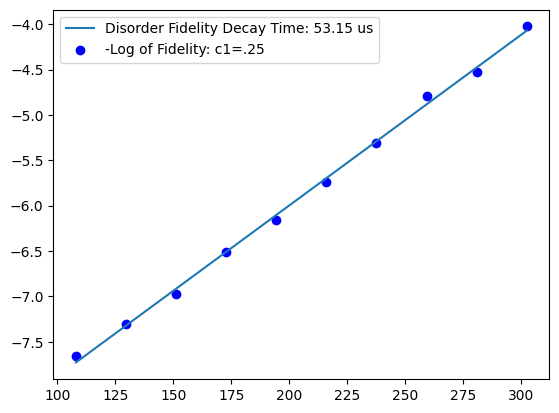

In [171]:
x=(.25)*times[4:14]
y= -np.log(diz_fidelity_short_25[4:14])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]))
plt.scatter(x,y ,label="-Log of Fidelity: c1=.25",marker="o",color="blue")

plt.legend()
plt.show()

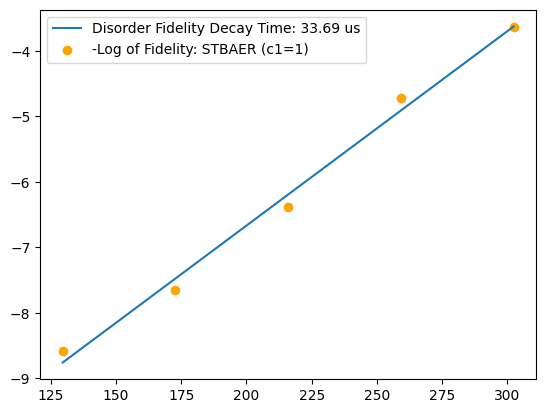

In [180]:
x=(1)*times[2:7]/2
y=-np.log(diz_staber_fid[2:7])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]))
plt.scatter(x, y,label="-Log of Fidelity: STBAER (c1=1)",marker="o",color="orange")

plt.legend()
plt.show()

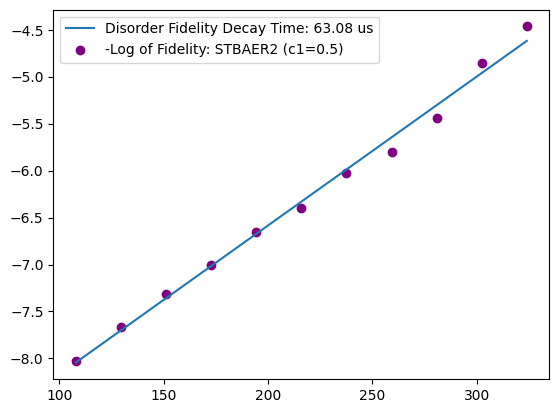

In [187]:
x=(0.5)*times[4:15]/2
y=-np.log(diz_staber2_fid[4:15])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]))
plt.scatter(x, y,label="-Log of Fidelity: STBAER2 (c1=0.5)",marker="o",color="purple")

plt.legend()
plt.show()

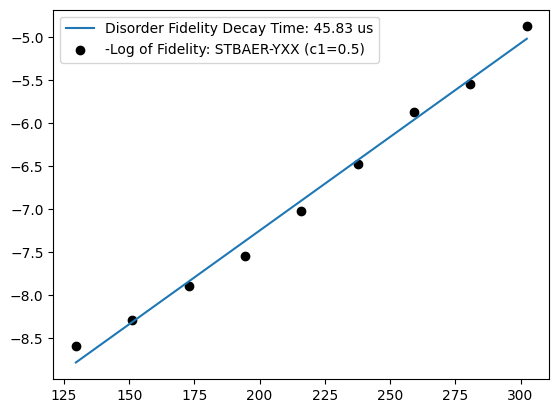

In [202]:
x=(0.5)*times[5:14]/2
y=-np.log(diz_staberYXX_fid[5:14])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]))
plt.scatter(x, y,label="-Log of Fidelity: STBAER-YXX (c1=0.5)",marker="o",color="black")

plt.legend()
plt.show()

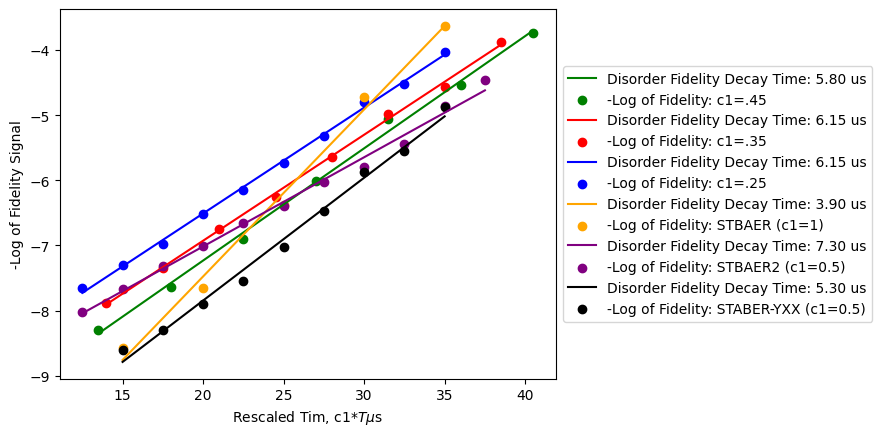

In [241]:
x=(.45)*times[2:9]
y= -np.log(diz_fidelity_short_45[2:9])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]),color="green")
plt.scatter(x,y,label="-Log of Fidelity: c1=.45",marker="o",color="green")

x=(.35)*times[3:11]
y= -np.log(diz_fidelity_short_35[3:11])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]),color="red")
plt.scatter(x,y,label="-Log of Fidelity: c1=.35",marker="o",color="red")

x=(.25)*times[4:14]
y= -np.log(diz_fidelity_short_25[4:14])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]),color="blue")
plt.scatter(x,y ,label="-Log of Fidelity: c1=.25",marker="o",color="blue")

x=(1)*times[2:7]/2
y=-np.log(diz_staber_fid[2:7])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]),color="orange")
plt.scatter(x, y,label="-Log of Fidelity: STBAER (c1=1)",marker="o",color="orange")

x=(0.5)*times[4:15]/2
y=-np.log(diz_staber2_fid[4:15])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]),color="purple")
plt.scatter(x, y,label="-Log of Fidelity: STBAER2 (c1=0.5)",marker="o",color="purple")

x=(0.5)*times[5:14]/2
y=-np.log(diz_staberYXX_fid[5:14])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]),color="black")
plt.scatter(x, y,label="-Log of Fidelity: STABER-YXX (c1=0.5)",marker="o",color="black")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(r"Rescaled Tim, c1*$T \mu$s")
plt.ylabel("-Log of Fidelity Signal")
plt.show()

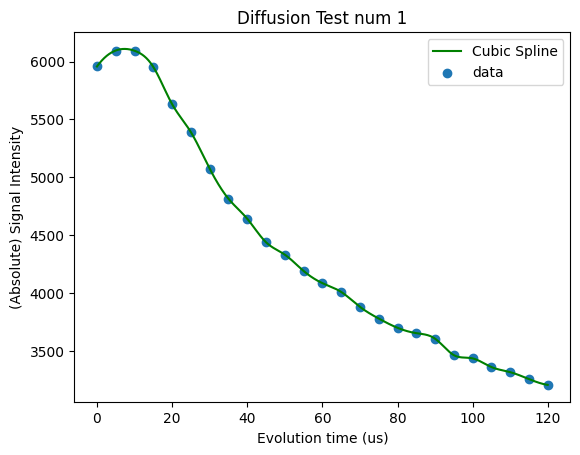

In [156]:
diff_test = nmr.Experiment(341,folder='expt9').tpc(cycle=5, use_real=False,title=r"Diffusion Test num 1",normalize=False)
times = np.arange(5,5*26,5)

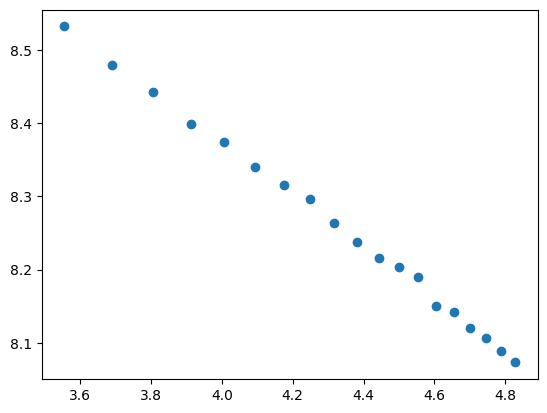

In [57]:
plt.scatter(np.log(times)[6:], np.log(diff_test)[6:])

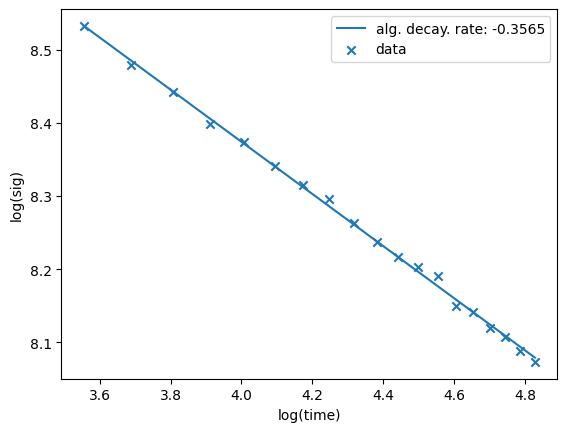

In [58]:
x=np.log(times[6:])
y=np.log(diff_test)[6:]

pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]))
plt.scatter(x,y,label="data",marker='x')
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

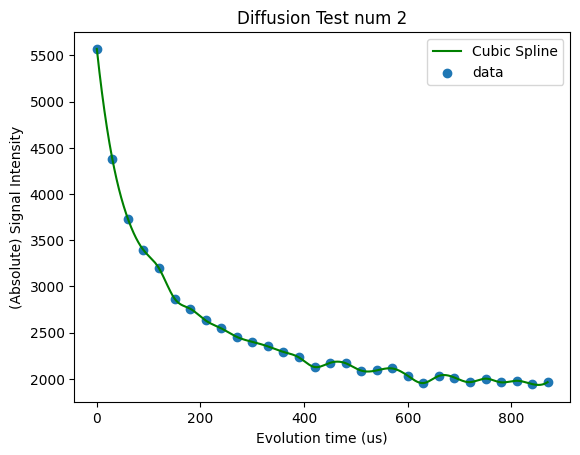

In [79]:
diff_test = nmr.Experiment(345,folder='expt9').tpc(cycle=30, use_real=False,title=r"Diffusion Test num 2",normalize=False)
times = np.arange(30,30*31,30)

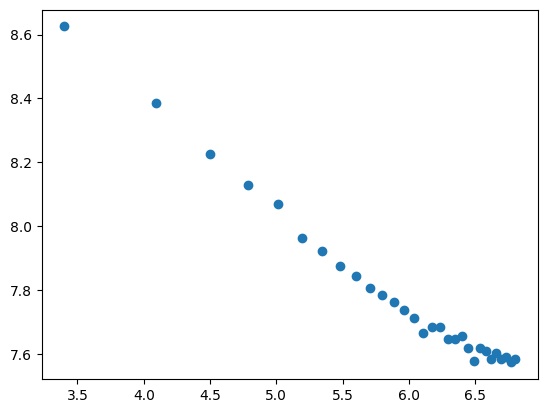

In [70]:
plt.scatter(np.log(times), np.log(diff_test))

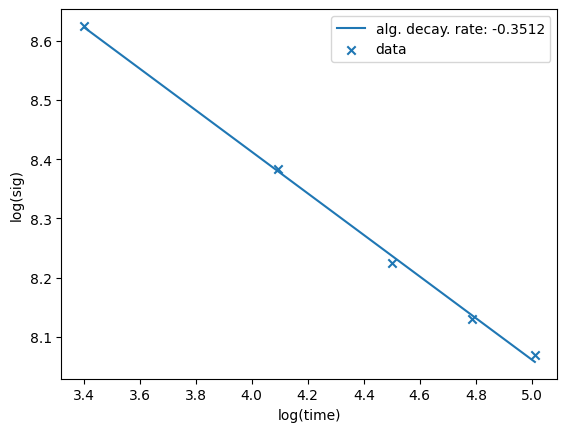

In [78]:
x=np.log(times[:5])
y=np.log(diff_test)[:5]

pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]))
plt.scatter(x,y,label="data",marker='x')
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

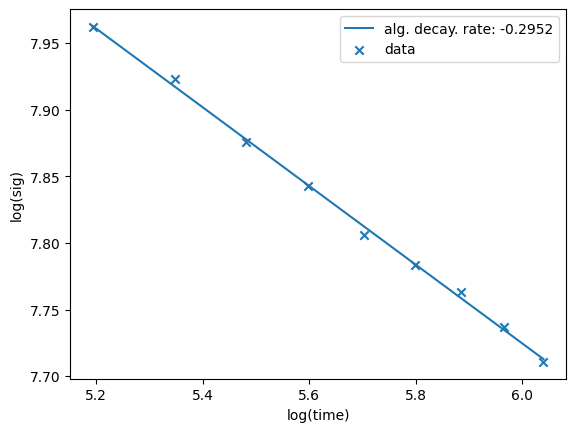

In [74]:
x=np.log(times[5:14])
y=np.log(diff_test)[5:14]

pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]))
plt.scatter(x,y,label="data",marker='x')
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

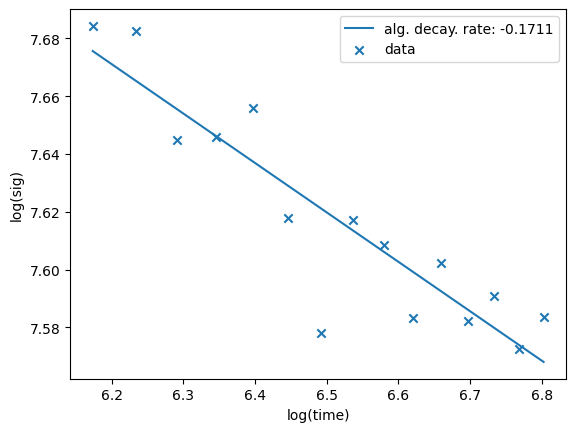

In [75]:
x=np.log(times[15:])
y=np.log(diff_test)[15:]

pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]))
plt.scatter(x,y,label="data",marker='x')
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

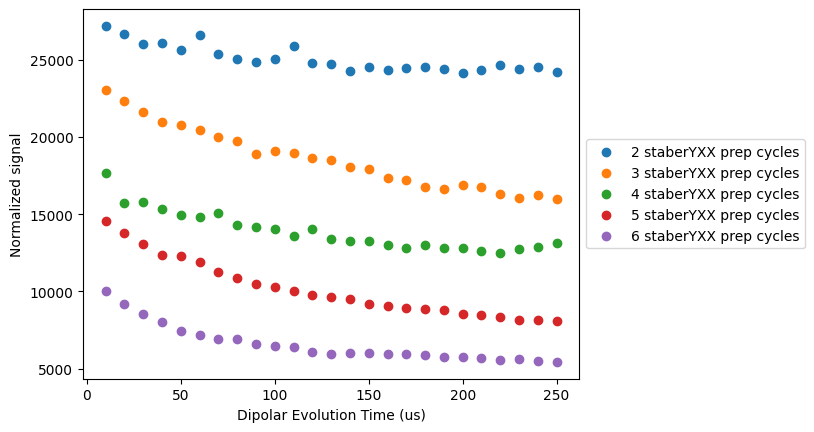

In [242]:
diffusion_varPrep = nmr.Experiment(364,folder='expt9').load_tpc3d(use_real=False,normalize=False)
times = np.arange(10,10*26,10)

for idx, sig in enumerate(diffusion_varPrep):
    plt.scatter(times, sig, label=f"{2+idx} staberYXX prep cycles")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Dipolar Evolution Time (us)")
plt.ylabel("Normalized signal")
plt.show()

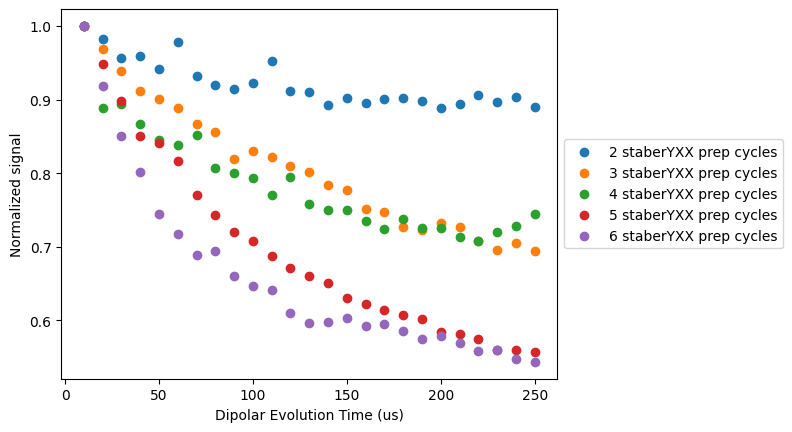

In [217]:
diffusion_varPrep = nmr.Experiment(364,folder='expt9').load_tpc3d(use_real=False,normalize=True)
times = np.arange(10,10*26,10)

for idx, sig in enumerate(diffusion_varPrep):
    plt.scatter(times, sig, label=f"{2+idx} staberYXX prep cycles")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Dipolar Evolution Time (us)")
plt.ylabel("Normalized signal")
plt.show()

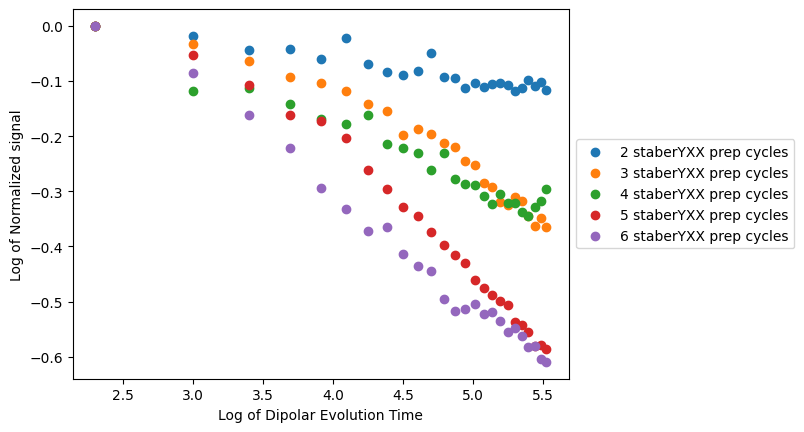

In [219]:
for idx, sig in enumerate(diffusion_varPrep):
    plt.scatter(np.log(times), np.log(sig), label=f"{2+idx} staberYXX prep cycles")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Log of Dipolar Evolution Time")
plt.ylabel("Log of Normalized signal")
plt.show()

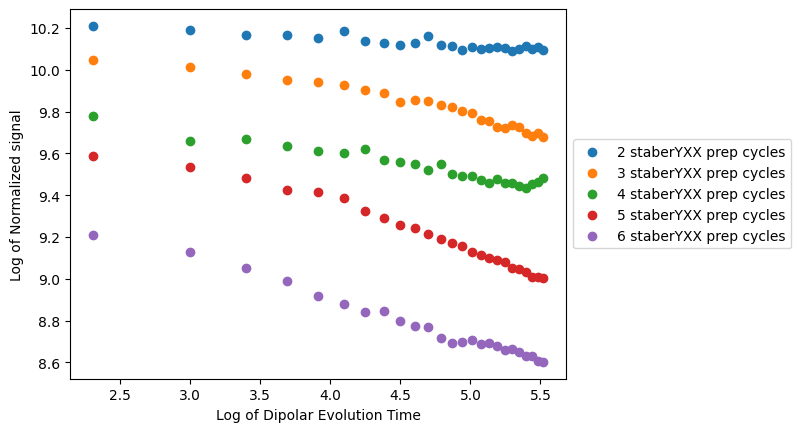

In [220]:
diffusion_varPrep = nmr.Experiment(364,folder='expt9').load_tpc3d(use_real=False,normalize=False)
times = np.arange(10,10*26,10)
for idx, sig in enumerate(diffusion_varPrep):
    plt.scatter(np.log(times), np.log(sig), label=f"{2+idx} staberYXX prep cycles")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Log of Dipolar Evolution Time")
plt.ylabel("Log of Normalized signal")
plt.show()

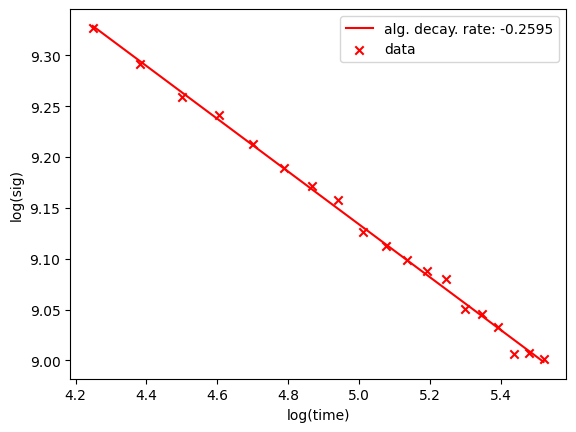

In [226]:
diffusionRaw = diffusion_varPrep[3]
x = np.log(times[6:])
y =  np.log(diffusionRaw[6:])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]),color="red")
plt.scatter(x,y,label="data",marker='x',color="red")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

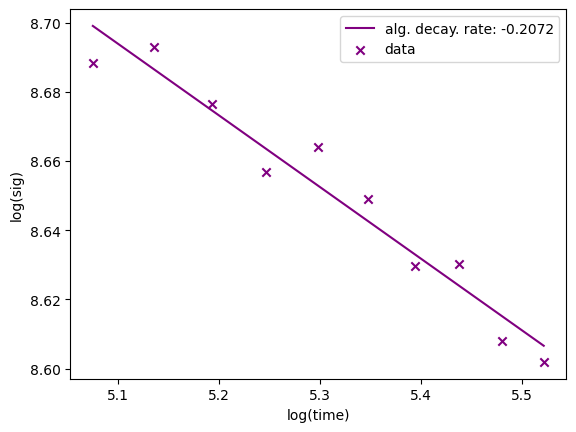

In [230]:
diffusionRaw = diffusion_varPrep[4]
x = np.log(times[15:])
y =  np.log(diffusionRaw[15:])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]),color="purple")
plt.scatter(x,y,label="data",marker='x',color="purple")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

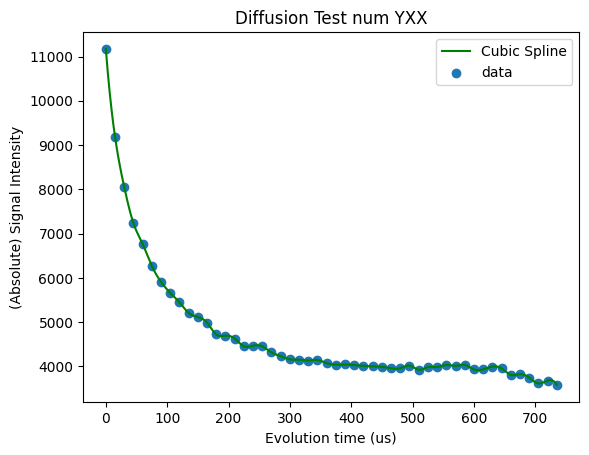

In [257]:
diff_yxx = nmr.Experiment(383,folder='expt9').tpc(cycle=15, use_real=False,title=r"Diffusion Test num YXX",normalize=False)
times = np.arange(15,15*len(diff_yxx)+15,15)

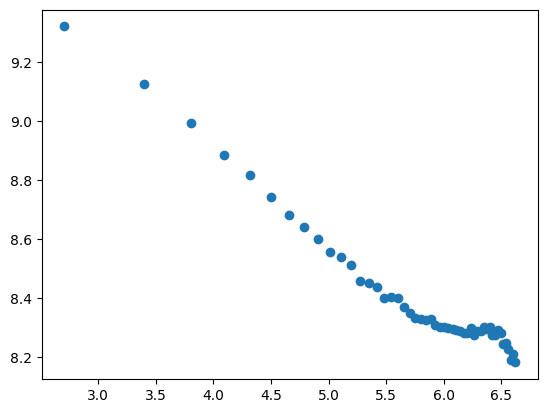

In [259]:
plt.scatter(np.log(times),np.log(diff_yxx))

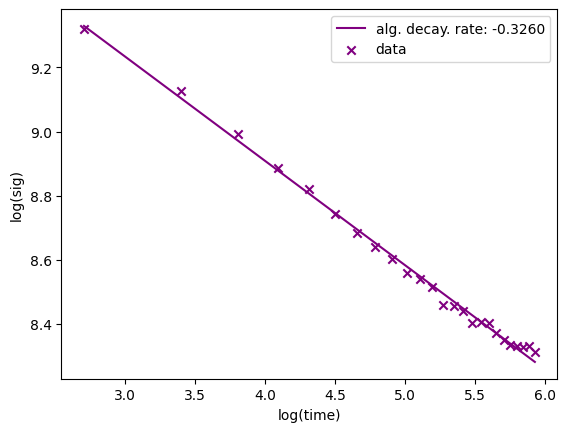

In [261]:
x = np.log(times[:25])
y =  np.log(diff_yxx[:25])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]),color="purple")
plt.scatter(x,y,label="data",marker='x',color="purple")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

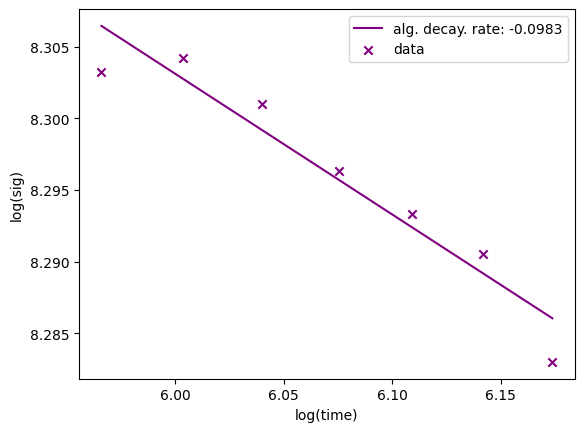

In [264]:
x = np.log(times[25:32])
y =  np.log(diff_yxx[25:32])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]),color="purple")
plt.scatter(x,y,label="data",marker='x',color="purple")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

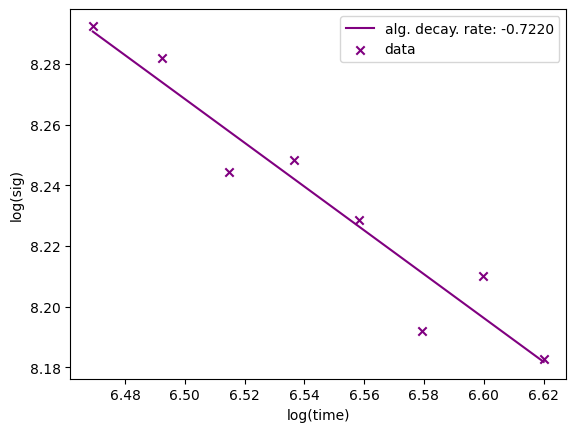

In [266]:
x = np.log(times[42:])
y =  np.log(diff_yxx[42:])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]),color="purple")
plt.scatter(x,y,label="data",marker='x',color="purple")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()